<a href="https://colab.research.google.com/github/ashutoshsinha25/pepcoding_FJP_DS/blob/main/Pytorch/FJP_DS_Pytorch_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install torch torchvision torchaudio 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
import torch 
import numpy as np 

## numpy interoperability

In [2]:
a = torch.tensor([1,2,3])
a

tensor([1, 2, 3])

In [3]:
print(a.size())

torch.Size([3])


In [4]:
b = torch.tensor([[1,2,3], [4,5,6]])
b.size()

torch.Size([2, 3])

In [5]:
b[: , :2].clone()

tensor([[1, 2],
        [4, 5]])

In [6]:
b[0 , :2].clone()


tensor([1, 2])

In [7]:
a = torch.ones(3 , 5)
a

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])

In [8]:
a.numpy()

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]], dtype=float32)

In [9]:
b = np.array([5,3,6,7])
torch.from_numpy(b)

tensor([5, 3, 6, 7])

## CPU and GPU 

In [10]:
if torch.cuda.is_available():
  device = 'cuda'
else:
  device = 'cpu'

In [11]:
device # if we change the runtime type to None , it would chow 'cpu' here

'cuda'

In [12]:
a_gpu = torch.tensor([1,2,3] , device = device)
a_gpu

tensor([1, 2, 3], device='cuda:0')

## save tensor

In [13]:
a = torch.tensor([1,3,45,6] , device = device)

In [14]:
torch.save(a , 'a_tensor.t')


In [16]:
b = torch.load('a_tensor.t')
b

tensor([ 1,  3, 45,  6], device='cuda:0')

## dataset

In [17]:
from torchvision import datasets

In [18]:
df_train = datasets.CIFAR10('./datasets', train=True, download=True)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./datasets/cifar-10-python.tar.gz to ./datasets


In [19]:
df_val = datasets.CIFAR10('./datasets', train=False, download=True)

Files already downloaded and verified


In [20]:
import matplotlib.pyplot as plt 

In [22]:
img , label = df_train[1]

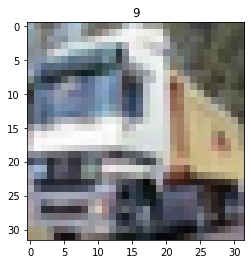

In [23]:
plt.imshow(img)
plt.title(label)
plt.show()

In [24]:
from torchvision import transforms

In [25]:
to_tensor = transforms.ToTensor()
img_t = to_tensor(img)

In [27]:
img_t , img_t.shape

(tensor([[[0.6039, 0.4941, 0.4118,  ..., 0.3569, 0.3412, 0.3098],
          [0.5490, 0.5686, 0.4902,  ..., 0.3765, 0.3020, 0.2784],
          [0.5490, 0.5451, 0.4510,  ..., 0.3098, 0.2667, 0.2627],
          ...,
          [0.6863, 0.6118, 0.6039,  ..., 0.1647, 0.2392, 0.3647],
          [0.6471, 0.6118, 0.6235,  ..., 0.4039, 0.4824, 0.5137],
          [0.6392, 0.6196, 0.6392,  ..., 0.5608, 0.5608, 0.5608]],
 
         [[0.6941, 0.5373, 0.4078,  ..., 0.3725, 0.3529, 0.3176],
          [0.6275, 0.6000, 0.4902,  ..., 0.3882, 0.3137, 0.2863],
          [0.6078, 0.5725, 0.4510,  ..., 0.3216, 0.2745, 0.2706],
          ...,
          [0.6549, 0.6039, 0.6275,  ..., 0.1333, 0.2078, 0.3255],
          [0.6039, 0.5961, 0.6314,  ..., 0.3647, 0.4471, 0.4745],
          [0.5804, 0.5804, 0.6118,  ..., 0.5216, 0.5255, 0.5216]],
 
         [[0.7333, 0.5333, 0.3725,  ..., 0.2784, 0.2784, 0.2745],
          [0.6627, 0.6039, 0.4627,  ..., 0.3059, 0.2431, 0.2392],
          [0.6431, 0.5843, 0.4392,  ...,

In [28]:
a = torch.transpose(img_t , 0 , 1)
a = torch.transpose(a , 1 , 2)
a.shape

torch.Size([32, 32, 3])

In [29]:
df_train = datasets.CIFAR10('./datasets', train=True, download=True, transform=to_tensor)

Files already downloaded and verified


In [30]:
img, label = df_train[0]
type(img), type(label)

(torch.Tensor, int)

## DCGAN

In [31]:
import os 
import torch
import matplotlib.pyplot as plt 
from IPython import display 
import time 
from tqdm import tqdm 

In [32]:
DATASET_ROOT = 'dataset/'
CHECKPOINT_GEN = 'gen.pth.tar'
CHECKPOINT_DISC = 'disc.pth.tar'
LEARNING_RATE = 2e-4

LOAD_MODEL = os.path.exists(CHECKPOINT_GEN) and os.path.exists(CHECKPOINT_DISC)
SAVE_MODEL = True

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [33]:
def save_checkpoint(model, optimizer, filename="my_checkpoint.pth.tar"):
    print("=> Saving checkpoint at", filename)
    checkpoint = {
        "state_dict": model.state_dict(),
        "optimizer": optimizer.state_dict(),
    }
    torch.save(checkpoint, filename)


def load_checkpoint(checkpoint_file, model, optimizer, lr):
    print("=> Loading checkpoint from", checkpoint_file)
    checkpoint = torch.load(checkpoint_file, map_location=device)
    # model.load_state_dict(checkpoint)
    model.load_state_dict(checkpoint["state_dict"])
    optimizer.load_state_dict(checkpoint["optimizer"])

    for param_group in optimizer.param_groups:
        param_group["lr"] = lr

## discriminator / generator model

In [34]:
from audioop import bias
import torch.nn as nn

class Discriminator(nn.Module):
    def __init__(self, channels_img, features_d):
        super(Discriminator, self).__init__()
        self.disc = nn.Sequential(
            # N x channel_img x 64 x 64
            # https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html
            nn.Conv2d(
                channels_img, features_d, 4, 2, 1
            ),
            nn.LeakyReLU(0.2),

            self._block(features_d, features_d*2, 4, 2, 1), # 16 x 16
            self._block(features_d*2, features_d*4, 4, 2, 1), # 8x8
            self._block(features_d*4, features_d*8, 4, 2, 1), # 4x4
            nn.Conv2d(features_d*8, 1, 4, 2, 0), # 1 x 1
            nn.Sigmoid(),
        )
    
    def _block(self, in_channels, out_channels, kernel_size, stride, padding):
        return nn.Sequential(
            nn.Conv2d(
                in_channels,
                out_channels,
                kernel_size,
                stride,
                padding,
                bias=False, # because we have used BatchNorm
            ),
            nn.BatchNorm2d(out_channels),
            nn.LeakyReLU(0.2),
        )
    
    def forward(self, x):
        return self.disc(x)

class Generator(nn.Module):
    def __init__(self, z_dim, channels_img, features_g):
        super(Generator, self).__init__()
        self.net = nn.Sequential(
            # N * z_dim * 1 * 1
            self._block(z_dim, features_g*16, 4, 1, 0), # n f_G*16 4 4
            self._block(features_g*16, features_g*8, 4, 2, 1), # 8x8
            self._block(features_g*8, features_g*4, 4, 2, 1), # 16x16
            self._block(features_g*4, features_g*2, 4, 2, 1), # 32x32
            nn.ConvTranspose2d(
                features_g*2,
                channels_img,
                4,
                2,
                1
            ),
            nn.Tanh(), # output [-1, 1]
        )
    
    def _block(self, in_channels, out_channels, kernel, stride, padding):
        return nn.Sequential(
            nn.ConvTranspose2d(
                in_channels,
                out_channels,
                kernel,
                stride,
                padding,
                bias=False,
            ),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(),
        )
    
    def forward(self, x):
        return self.net(x)

def init_weights(model):
    for m in model.modules():
        if isinstance(m, (nn.Conv2d, nn.ConvTranspose2d, nn.BatchNorm2d)):
            nn.init.normal_(m.weight.data, 0.0, 0.02)
# torch.nn.init.xavier_uniform(conv1.weight)

def test():
    N, in_channels, H, W = 8, 3, 64, 64
    z_dim = 100
    x = torch.randn((N, in_channels, H, W))
    disc = Discriminator(in_channels, 8)
    init_weights(disc)
    assert disc(x).shape == (N, 1, 1, 1)
    gen = Generator(z_dim, in_channels, 8)
    init_weights(gen)
    z = torch.randn((N, z_dim, 1, 1))
    assert gen(z).shape == (N, in_channels, H, W)
    print('Success Test')

test()

Success Test


In [35]:
BATCH_SIZE = 128
IMAGE_SIZE = 64
CHANNELS_IMG = 1
NOISE_DIM = 100
NUM_EPOCHS = 5
FEATURES_DISC = 64
FEATURES_GEN = 64

fixed_noise = torch.randn(32, NOISE_DIM, 1, 1).to(device)

In [36]:

gen = Generator(NOISE_DIM, CHANNELS_IMG, FEATURES_GEN).to(device)
disc = Discriminator(CHANNELS_IMG, FEATURES_DISC).to(device)
init_weights(gen)
init_weights(disc)

In [37]:
from locale import normalize
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter

# Tutorial dataset
# https://pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html

transform = transforms.Compose([
    transforms.Resize(IMAGE_SIZE),
    transforms.ToTensor(),
    transforms.Normalize(
        [0.5]*CHANNELS_IMG, [0.5]*CHANNELS_IMG 
    ),
])

dataset = datasets.MNIST(root=DATASET_ROOT, train=True, transform=transform,download=True)
# dataset = datasets.ImageFolder(root=DATASET_ROOT, train=True, transform=transform)

loader = DataLoader(dataset, batch_size = BATCH_SIZE, shuffle=True)

opt_gen = optim.Adam(gen.parameters(), lr=LEARNING_RATE, betas=(0.5, 0.999))
opt_disc = optim.Adam(disc.parameters(), lr=LEARNING_RATE, betas=(0.5, 0.999))
# https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html
criterion = nn.BCELoss()

fixed_noise = torch.randn(32, NOISE_DIM, 1, 1).to(device)
writer_real = SummaryWriter(f'logs/real')
writer_fake = SummaryWriter(f'logs/fake')
step = 0

gen.train()
disc.train()

if LOAD_MODEL:
    load_checkpoint(
        CHECKPOINT_GEN,
        gen,
        opt_gen,
        LEARNING_RATE,
    )
    load_checkpoint(
        CHECKPOINT_DISC,
        disc,
        opt_disc,
        LEARNING_RATE,
    )

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting dataset/MNIST/raw/train-images-idx3-ubyte.gz to dataset/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting dataset/MNIST/raw/train-labels-idx1-ubyte.gz to dataset/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting dataset/MNIST/raw/t10k-images-idx3-ubyte.gz to dataset/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting dataset/MNIST/raw/t10k-labels-idx1-ubyte.gz to dataset/MNIST/raw



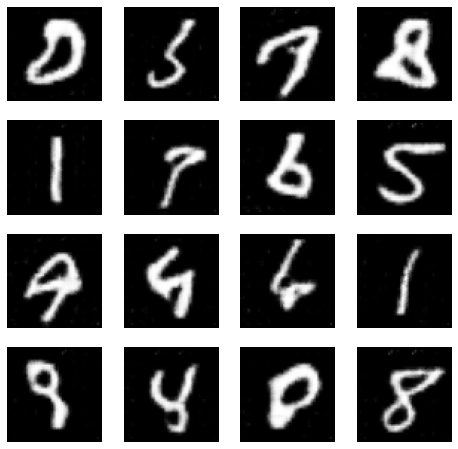

469it [03:21,  2.32it/s]


Time for epoch 5 is 201.76935529708862 sec
=> Saving checkpoint at gen.pth.tar
=> Saving checkpoint at disc.pth.tar


In [38]:
# Perform BackProp
# https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html

for epoch in range(NUM_EPOCHS):
    start = time.time()
    print('\nEpoch', epoch+1, '/', NUM_EPOCHS)
    for batch_idx, (real, _) in tqdm(enumerate(loader)):
        real = real.to(device)
        noise = torch.randn((BATCH_SIZE, NOISE_DIM, 1, 1)).to(device)
        fake = gen(noise)

        # train Discrimanator
        disc_real = disc(real).reshape(-1)
        disc_fake = disc(fake).reshape(-1)
        
        loss_disc_real = criterion(disc_real, torch.ones_like(disc_real))
        loss_disc_fake = criterion(disc_fake, torch.zeros_like(disc_fake))
        loss_disc = (loss_disc_real + loss_disc_fake)/2

        # https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html
        disc.zero_grad()
        loss_disc.backward(retain_graph=True) # gradients calculate
        opt_disc.step() # update weights

        # train Generator
        output = disc(fake).reshape(-1)
        loss_gen = criterion(output, torch.ones_like(output))
        gen.zero_grad()
        loss_gen.backward()
        opt_gen.step()

        # print('.', end='', flush=True)

        if batch_idx%50 == 0:
            save_checkpoint(gen, opt_gen, filename=CHECKPOINT_GEN)
            save_checkpoint(disc, opt_disc, filename=CHECKPOINT_DISC)

        if batch_idx % 50 == 0:
            display.clear_output(wait=True)
            predictions = gen(fixed_noise)
            predictions = predictions.detach().cpu().numpy()


            fig = plt.figure(figsize=(8, 8))
            for i in range(min(16, predictions.shape[0])):
                plt.subplot(4, 4, i+1)
                plt.imshow(predictions[i, 0, :, :] * 127.5 + 127.5, cmap='gray')
                plt.axis('off')
                
            plt.savefig('image_at_epoch_{:04d}.png'.format(step))
            plt.show()
        
            step += 1
    
    print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))
    if SAVE_MODEL:
        save_checkpoint(gen, opt_gen, filename=CHECKPOINT_GEN)
        save_checkpoint(disc, opt_disc, filename=CHECKPOINT_DISC)

In [39]:
# To generate GIFs
!pip install imageio
# !pip install git+https://github.com/tensorflow/docs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [40]:
import imageio
import glob

In [41]:
anim_file = 'dcgan_MNIST.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
  filenames = glob.glob('image_at_epoch*.png')
  filenames = sorted(filenames)
  for filename in filenames:
    image = imageio.imread(filename)
    writer.append_data(image)
  # image = imageio.imread(filename)
  # writer.append_data(image)